In [24]:
from shapely.geometry import Point
from shapely.geometry import Polygon
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.express as px

with open('NZ_all_m0mw.txt') as f:
    array = [[x for x in line.split()] for line in f]
cmt_data = np.array(array)

In [25]:
zonea = Polygon([(175.5,-42),(174.7,-41.2),(176,-40),(175.5, -39.3),(177,-37),(180,-32.1),(180,-30),(178,-30),(173,-40)])
zoneb = Polygon([(-180,-30),(-180,-32.1),(-179,-30)])

In [26]:
#3D graph

zone_cmt1 = []
zone_cmt2 = []

for line in cmt_data:
    coordinates = Point(float(line[0]),float(line[1]))

    if coordinates.within(zonea):
        zone_cmt1.append(line[0:15])
        
    if coordinates.within(zoneb):
        zone_cmt2.append(line[0:15])
        
x=[]
y=[]
z=[]
mag=[]

for line in zone_cmt1:
    x.append(float(line[0]))
    y.append(float(line[1]))
    z.append(float(line[2]))
    mag.append(float(line[14]))

for line in zone_cmt2:
    x.append(float(line[0])+360)
    y.append(float(line[1]))
    z.append(float(line[2]))
    mag.append(float(line[14]))
    
px.scatter_3d(x=x, y=y, z=z, size=mag, color=mag, range_z=[550,0])

In [27]:
#read shallow earthquake data
zone_cmt = []
dep = 50

for line in cmt_data:
    coordinates = Point(float(line[0]),float(line[1]))
  
    if coordinates.within(zonea):
        if float(line[2]) <= dep:
            zone_cmt.append(line[0:15])
            
    if coordinates.within(zoneb):
        if float(line[2]) <= dep:
            zone_cmt.append(line[0:15])


In [28]:
#moment tensor summation
mrr = 0
mtt = 0
mpp = 0
mrt = 0
mrp = 0 
mtp = 0

for k in range(len(zone_cmt)):
    mrr += float(zone_cmt[k][3])*(10**(float(zone_cmt[k][9])-7))
    mtt += float(zone_cmt[k][4])*(10**(float(zone_cmt[k][9])-7))
    mpp += float(zone_cmt[k][5])*(10**(float(zone_cmt[k][9])-7))
    mrt += float(zone_cmt[k][6])*(10**(float(zone_cmt[k][9])-7))
    mrp += float(zone_cmt[k][7])*(10**(float(zone_cmt[k][9])-7))
    mtp += float(zone_cmt[k][8])*(10**(float(zone_cmt[k][9])-7))

print(mrr/(10**20), mtt/(10**20), mpp/(10**20), mrt/(10**20), mrp/(10**20), mtp/(10**20))

-0.011259 0.009391 0.001766 0.017087 -0.002503 0.054962


In [29]:
#velocity
m0_sum = 0
for k in range(len(zone_cmt)):
    m0_sum += float(zone_cmt[k][13])*(10**(-7))
miu = 3.3*(10**10)
fault_length = 1508956 #m
depth = dep*1000 #m
dip = 74*(np.pi/180) #radian
w = depth/np.sin(dip) #m

t = 44+10/12 #years
t_secs = t*365.25*24*60*60

velocity = m0_sum/(miu*fault_length*w*t_secs)
velocity_mm =(velocity*1000)*(365.25 * 24 * 60 * 60)
print('Shallow velocity = ',velocity_mm ,'mm/yr')

Shallow velocity =  0.06275218559447794 mm/yr


In [32]:
#strain rate
area = 170.182*(10**9)
vol = area * depth
D_1 = 4.5
D_2 = -4.38

strain_rate_1 = D_1*(10**20)/(2*miu*vol*t)*(10**6)
strain_rate_2 = D_2*(10**20)/(2*miu*vol*t)*(10**6)
print('strain rate 1 =',strain_rate_1 ,'ppm/year')
print('strain rate 2 =',strain_rate_2 ,'ppm/year')

strain rate 1 = 0.017872443015889923 ppm/year
strain rate 2 = -0.01739584453546619 ppm/year


Highest magnitude:  6.7
Lowest magnitude:  5.0
Number of earthquakes 102
[102, 102, 48, 22, 4, 0, 0]


<ipython-input-31-f49a1bd7c8e4>:62: RuntimeWarning:

divide by zero encountered in log10



[nan nan]


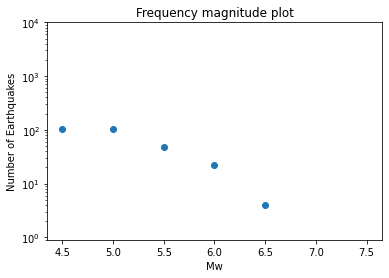

b-value = nan


In [31]:
#freq mag plot
zone_cmt = []

mmax = np.str_(0)
mmin = np.str_(6)
for line in cmt_data:
    coordinates = Point(float(line[0]),float(line[1]))

    if coordinates.within(zonea):
        zone_cmt.append(line[0:15])
    if coordinates.within(zoneb):
        zone_cmt.append(line[0:15])

for line in zone_cmt:   
        if line[14] > mmax:
            mmax = line[14]
        if line[14] < mmin:
            mmin = line[14]
print('Highest magnitude: ',mmax)
print('Lowest magnitude: ',mmin)

count4 = 0
count4_5 = 0
count5 = 0
count5_5 = 0
count6 = 0
count6_5 = 0
count7 = 0
count7_5 = 0
count8 = 0
count8_5 = 0

for k in range(len(zone_cmt)):
    if float(zone_cmt[k][14]) >= 4:
        count4 += 1
        if float(zone_cmt[k][14]) >= 4.5:
            count4_5 += 1
            if float(zone_cmt[k][14]) >= 5:
                count5 += 1
                if float(zone_cmt[k][14]) >= 5.5:
                    count5_5 +=1
                    if float(zone_cmt[k][14]) >= 6:
                        count6 +=1
                        if float(zone_cmt[k][14]) >= 6.5:
                            count6_5 +=1
                            if float(zone_cmt[k][14]) >= 7:
                                count7 +=1
                                if float(zone_cmt[k][14]) >= 7.5:
                                    count7_5 +=1
                                    if float(zone_cmt[k][14]) >= 8:
                                        count8 +=1
                                        if float(zone_cmt[k][14]) >= 8.5:
                                            count8_5 +=1
                    
            
print('Number of earthquakes',len(zone_cmt))

x = [4.5, 5, 5.5, 6, 6.5, 7, 7.5]
y = [count4_5, count5, count5_5, count6, count6_5, count7, count7_5]
print(y)
plt.scatter(x,y)
p = np.polyfit(x, np.log10(y), 1)
print(p)

plt.semilogy(x, 10**(p[0]*np.array(x) + p[1]), 'g--')
plt.yscale('log')
plt.ylim([0.9, 10000])
plt.title("Frequency magnitude plot")
plt.xlabel("Mw")
plt.ylabel("Number of Earthquakes")
plt.show()

print('b-value =', -p[0])